# Chapter 11 - Statistics for Ensemble Methods

In [2]:
from random import choice
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Bootstrapping

In [4]:
url1=('https://raw.githubusercontent.com/PacktPublishing/Essential-Statistics-for-Non-STEM-Data-Analysts/refs/heads/master/Chapter11/BostonHousing.csv')

boston = pd.read_csv(url1)

boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### Meaning of columns

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000 dollar
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in 1000 dollar's

In [6]:
boston.shape

(506, 14)

### Resample

In [8]:
from sklearn.utils import resample

In [9]:
rad = boston["rad"].values  # Extract the 'rad' column from the Boston dataset as a NumPy array

rad[:5]                     # Display the first 5 values of the 'rad' array

array([1, 2, 2, 3, 3], dtype=int64)

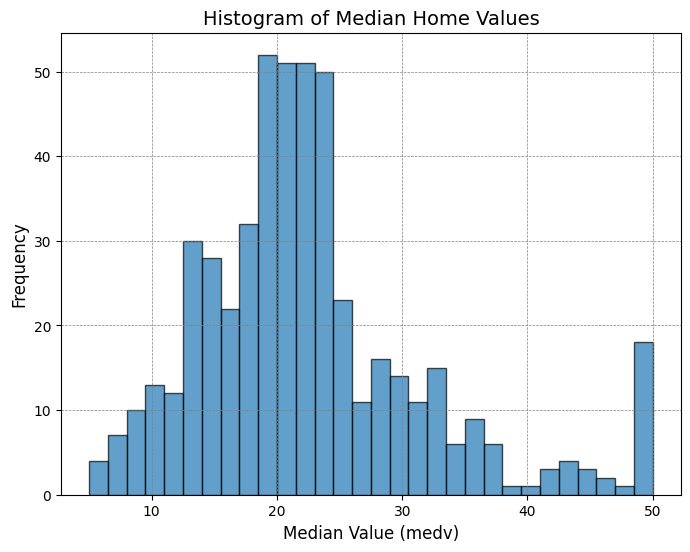

In [10]:
plt.figure(figsize=(8, 6))                    # Set the figure size

plt.hist(boston["medv"],                      # Plot a histogram for the 'medv' (Median Value of Owner-Occupied Homes) column
         bins=30,                             # Define the number of bins to group the data
         edgecolor="black",                   # Add black edges to the histogram bars for better contrast
         alpha=0.7)                           # Set the transparency level of the bars

plt.xlabel("Median Value (medv)", fontsize=12)             # Label the x-axis
plt.ylabel("Frequency", fontsize=12)                       # Label the y-axis
plt.title("Histogram of Median Home Values", fontsize=14)  # Add a title to the histogram

plt.grid(visible=True, linestyle="--", color="grey", linewidth=0.5)  # Add gridlines

plt.show()                                                           # Display the histogram

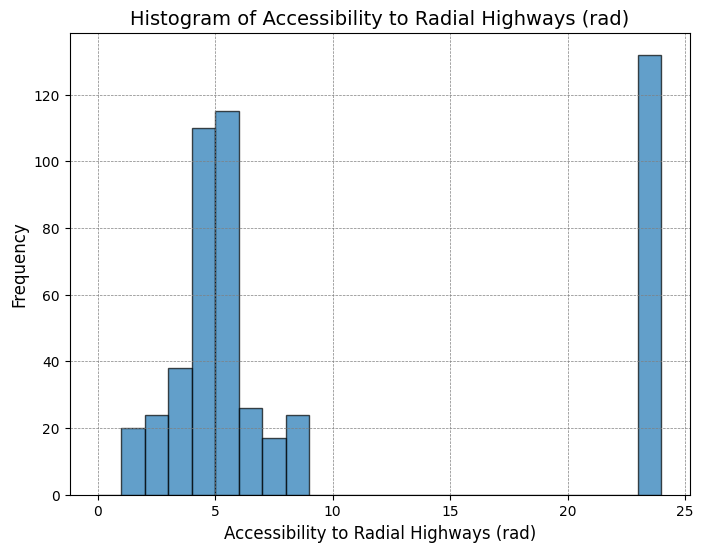

In [11]:
plt.figure(figsize=(8, 6))                          # Set the figure size

plt.hist(rad,                                       # Plot a histogram for the 'rad' variable
         bins=[i for i in range(25)],               # Define bins as a list ranging from 0 to 24
         edgecolor="black",                         # Add black edges to the bars for better visual separation
         alpha=0.7)                                 # Set the transparency level for the bars

plt.xlabel("Accessibility to Radial Highways (rad)", fontsize=12)              # Label the x-axis
plt.ylabel("Frequency", fontsize=12)                                           # Label the y-axis
plt.title("Histogram of Accessibility to Radial Highways (rad)", fontsize=14)  # Add a title

plt.grid(visible=True, linestyle="--", color="grey", linewidth=0.5)            # Add gridlines

plt.show()                                                                     # Display the histogram

In [12]:
rad_train = resample(rad,                           # Resample the 'rad' data
                     n_samples=50,                  # Specify the number of samples to 50
                     random_state=0)                # Set a random state for reproducibility

rad_train[:5]                                       # Display the first 5 elements of the resampled data

array([5, 3, 6, 5, 5], dtype=int64)

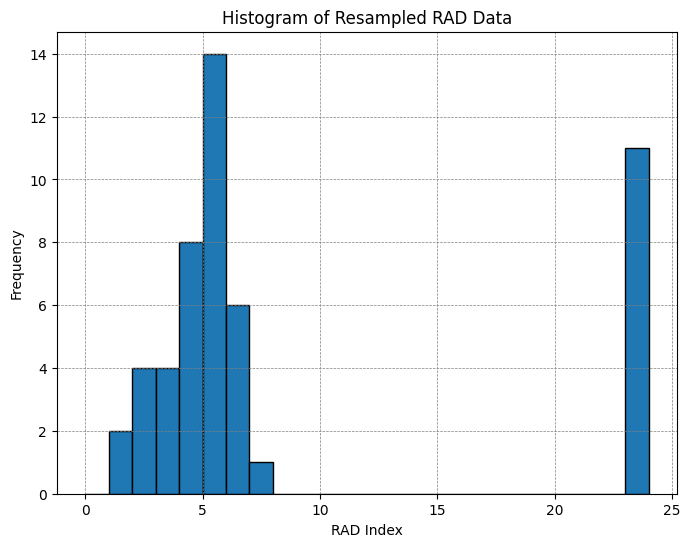

In [13]:
plt.figure(figsize=(8, 6))                           # Set the figure size

plt.hist(rad_train,                                  # Plot a histogram of the resampled 'rad_train' data
         bins=[i for i in range(25)],                # Define the bin edges from 0 to 24 (inclusive)
         color="C0",                                 # Use the default color 'C0' for the bars
         edgecolor="black")                          # Add black edges to the histogram bars

plt.xlabel("RAD Index")                              # Label the x-axis as 'RAD Index'
plt.ylabel("Frequency")                              # Label the y-axis as 'Frequency'
plt.title("Histogram of Resampled RAD Data")         # Add a title to the histogram
plt.grid(visible=True, linestyle="--", color="grey", linewidth=0.5)  # Add a grid

plt.show()                                           # Display the plot

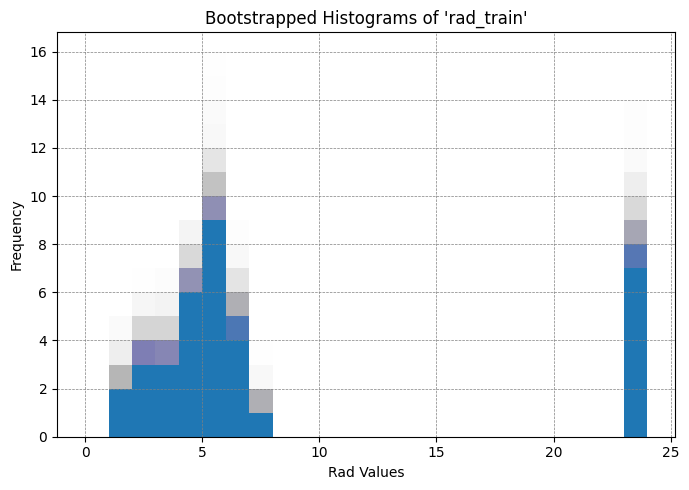

In [14]:
plt.figure(figsize=(7, 5))                                              # Set up the figure size for better visualization

for i in range(1000):                                                   # Loop 1000 times for bootstrapping
    bootstrapped = resample(rad_train,                                  # Resample 'rad_train' to create a new sample
                            n_samples=25,                               # Specify sample size for bootstrapping
                            random_state=i)                             # Use 'i' as the random seed for reproducibility
    
    plt.hist(bootstrapped,                                              # Plot a histogram for the bootstrapped sample
             bins=[i for i in range(25)],                               # Define bin edges from 0 to 24
             alpha=0.005,                                               # Set transparency to 0.005 for overlapping histograms
             color="C0")                                                # Use the default color 'C0' for the bars

plt.title("Bootstrapped Histograms of 'rad_train'")                     # Add a title to describe the plot
plt.xlabel("Rad Values")                                                # Label the x-axis
plt.ylabel("Frequency")                                                 # Label the y-axis
plt.grid(visible=True, linestyle="--", color="grey", linewidth=0.5)     # Add a grid for better readability
plt.tight_layout()                                                      # Adjust layout for better spacing
plt.show()                                                              # Display the plot

### Preprocessing and train/test splitting

In [16]:
from sklearn.model_selection import train_test_split

boston_bag = boston.copy()                                              # Create a copy of the 'boston' DataFrame to avoid modifying the original

boston_bag["medv"] = boston_bag["medv"].apply(                          # Transform the 'medv' column
    lambda x: int(x >= np.median(boston_bag["medv"])))                  # Set values to 1 if greater or equal to the median, otherwise 0

boston_bag_train, boston_bag_test = train_test_split(                   # Split the dataset into training and testing sets
    boston_bag,                                                         # Input data
    train_size=0.7,                                                     # Set 70% of the data for training
    shuffle=True,                                                       # Shuffle the data before splitting
    random_state=1)                                                     # Set a random seed for reproducibility

boston_bag_train_X = boston_bag_train.drop(["medv"], axis=1).to_numpy() # Extract training features as a NumPy array
boston_bag_train_y = boston_bag_train["medv"].to_numpy()                # Extract training labels as a NumPy array

boston_bag_test_X = boston_bag_test.drop(["medv"], axis=1).to_numpy()   # Extract testing features as a NumPy array
boston_bag_test_y = boston_bag_test["medv"].to_numpy()                  # Extract testing labels as a NumPy array

### Reproduce the Bias-Variance Tradeoff on a single decision tree

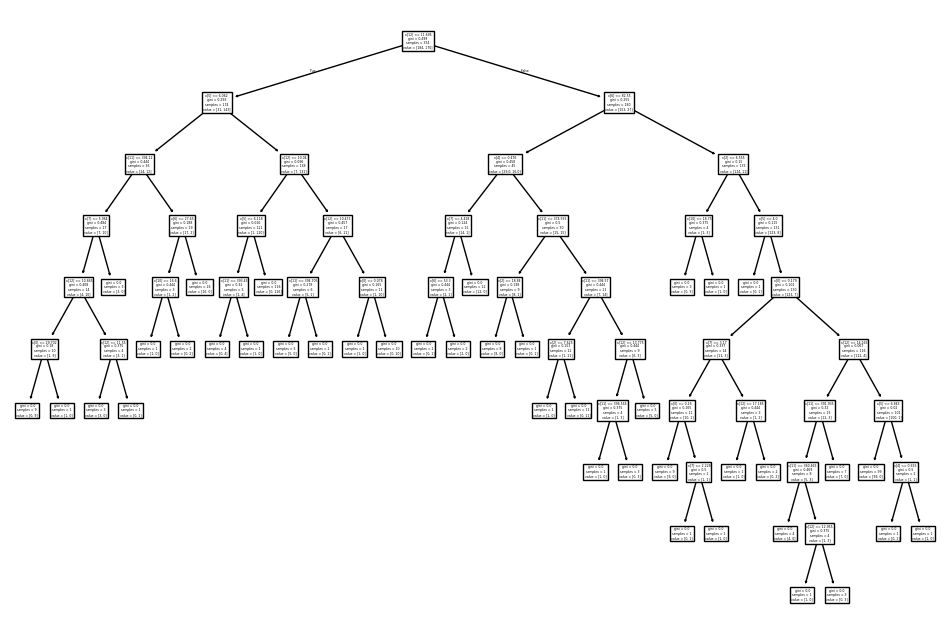

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn import tree

clf = DecisionTreeClassifier(random_state=0)        # Initialize a Decision Tree Classifier with a fixed random seed
clf.fit(boston_bag_train_X, boston_bag_train_y)     # Train the classifier using the training data

plt.figure(figsize=(12, 8))                         # Create a figure with a size of 12x8 inches
tree.plot_tree(clf);                                # Plot the decision tree structure

In [19]:
f1_score(boston_bag_train_y,clf.predict(boston_bag_train_X))

1.0

In [20]:
train_f1 = []                                               # Initialize an empty list to store F1-scores for training data
test_f1 = []                                                # Initialize an empty list to store F1-scores for test data
depths = range(1, 11)                                       # Define a range of tree depths from 1 to 10

for depth in depths:                                        # Iterate through each tree depth
    clf = DecisionTreeClassifier(random_state=0,            # Initialize a Decision Tree Classifier with fixed random seed
                                 max_depth=depth)           # Set the maximum depth for the current iteration
    clf.fit(boston_bag_train_X, boston_bag_train_y)         # Train the classifier on the training data
    
    train_f1.append(                                        # Append the F1-score for the training data to `train_f1`
        f1_score(boston_bag_train_y,                        # Calculate F1-score using true labels and predicted labels
                 clf.predict(boston_bag_train_X)))          # Predict labels for the training data
    
    test_f1.append(                                         # Append the F1-score for the test data to `test_f1`
        f1_score(boston_bag_test_y,                         # Calculate F1-score using true labels and predicted labels
                 clf.predict(boston_bag_test_X)))           # Predict labels for the test data

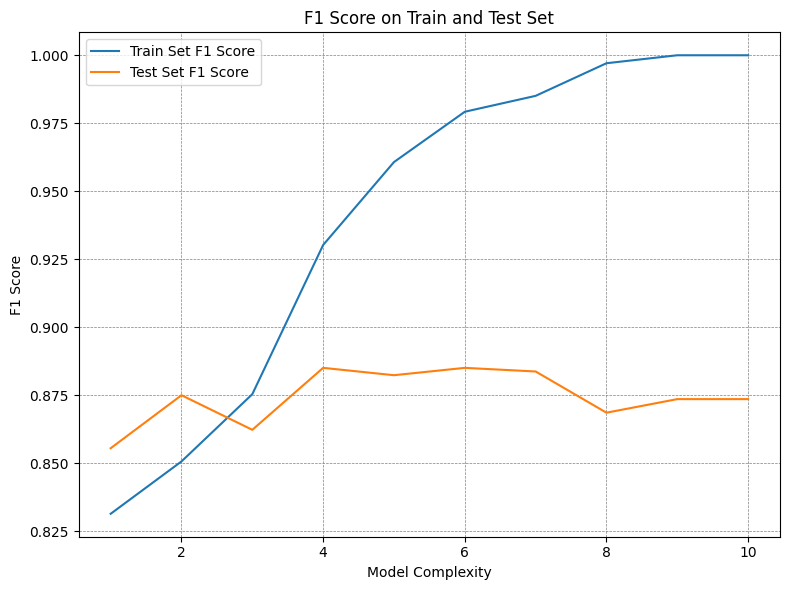

In [21]:
plt.figure(figsize=(8, 6))                                          # Set the figure size to 10x6 inches for better visibility

plt.plot(depths, train_f1,                                          # Plot F1 scores for the training set
         label="Train Set F1 Score")                                # Add a label for the training set plot

plt.plot(depths, test_f1,                                           # Plot F1 scores for the test set
         label="Test Set F1 Score")                                 # Add a label for the test set plot

plt.legend()                                                        # Add a legend to distinguish between train and test plots

plt.xlabel("Model Complexity")                                      # Label for the x-axis representing tree depth
plt.ylabel("F1 Score")                                              # Label for the y-axis representing F1 Score
plt.title("F1 Score on Train and Test Set")                         # Add a title for the plot

plt.grid(visible=True, linestyle="--", color="grey", linewidth=0.5) # Add a light grey dashed grid for better readability
plt.tight_layout()                                                  # Adjust layout for better spacing
plt.show();                                                         # Display the plot

*F1 score versus model complexity.*

### Bagging Classifier

In [24]:
from sklearn.ensemble import BaggingClassifier

base_estimator = DecisionTreeClassifier(random_state=0,            # Initialize a decision tree as the base estimator
                                        max_depth=4)               # Set maximum depth of the tree to 4

bagging_clf = BaggingClassifier(estimator=base_estimator,          # Use the decision tree as the base estimator for bagging
                                n_estimators=10,                   # Specify the number of trees in the bagging ensemble
                                n_jobs=20,                         # Use 20 parallel jobs for training
                                max_samples=0.7,                   # Use 70% of the training samples for each estimator
                                random_state=0)                    # Set random state for reproducibility

bagging_clf.fit(boston_bag_train_X, boston_bag_train_y);           # Train the bagging classifier on the training set

In [25]:
f1_score(boston_bag_train_y,                                       # True labels for the training set
         bagging_clf.predict(boston_bag_train_X))                  # Predictions on the training set by the bagging classifier

0.9432835820895522

In [26]:
f1_score(boston_bag_test_y,                                        # True labels for the test set
         bagging_clf.predict(boston_bag_test_X))                   # Predictions on the test set by the bagging classifier

0.8809523809523809

In [27]:
boston_bag_train, boston_bag_test = train_test_split(boston_bag,              # Split the dataset into training and testing sets
                                                     train_size=0.7,          # Specify 70% of the data for training
                                                     shuffle=True,            # Shuffle the data before splitting
                                                     random_state=0)          # Set a random state for reproducibility

# Separate features (X) and target variable (y) for training and testing sets
boston_bag_train_X, boston_bag_train_y = boston_bag_train.drop(["medv"], axis=1).to_numpy(), boston_bag_train["medv"].to_numpy()
boston_bag_test_X, boston_bag_test_y = boston_bag_test.drop(["medv"], axis=1).to_numpy(), boston_bag_test["medv"].to_numpy()

# Initialize lists to store F1 scores for training and testing sets
train_f1 = []  
test_f1 = []

# Define the number of estimators as powers of 2 plus 1 for the bagging classifier
n_estimators = [2**i + 1 for i in range(1, 8)]

# Loop through the defined number of estimators
for n_estimator in n_estimators:
    
    # Initialize the bagging classifier with the specified base estimator and number of estimators
    bagging_clf = BaggingClassifier(estimator=base_estimator,       # Initialize the Bagging Classifier with a base estimator
                                    n_estimators=n_estimator,       # Set the number of estimators in the ensemble
                                    n_jobs=-1,                      # Use all available CPU cores for parallel processing
                                    random_state=0)                 # Set a random state for reproducibility
    
    # Train the bagging classifier on the training data
    bagging_clf.fit(boston_bag_train_X, boston_bag_train_y)
    
    # Calculate F1 score for the training set predictions
    train_f1.append(f1_score(boston_bag_train_y, bagging_clf.predict(boston_bag_train_X)))
    
    # Calculate F1 score for the testing set predictions
    test_f1.append(f1_score(boston_bag_test_y, bagging_clf.predict(boston_bag_test_X)))

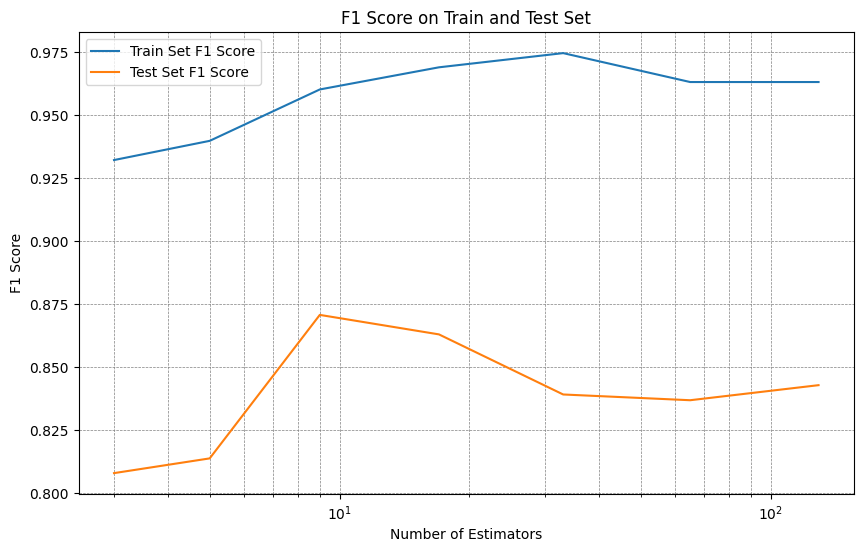

In [28]:
# Plot F1 scores for training and testing sets
plt.figure(figsize=(10, 6))                                   # Set figure size
plt.plot(n_estimators, train_f1, label="Train Set F1 Score")  # Plot F1 scores for training set
plt.plot(n_estimators, test_f1, label="Test Set F1 Score")    # Plot F1 scores for testing set
plt.xscale("log")                                             # Set x-axis to logarithmic scale
plt.legend()                                                  # Add a legend to differentiate lines
plt.xlabel("Number of Estimators")                            # Label for x-axis
plt.ylabel("F1 Score")                                        # Label for y-axis
plt.title("F1 Score on Train and Test Set")                   # Title of the plot

plt.grid(visible=True, which="both", linestyle="--",          # Add vertical and horizontal gridlines
         color="grey", linewidth=0.5, axis="both")            # Set gridlines for both axes

plt.show()                                                    # Display the plot

Another way:

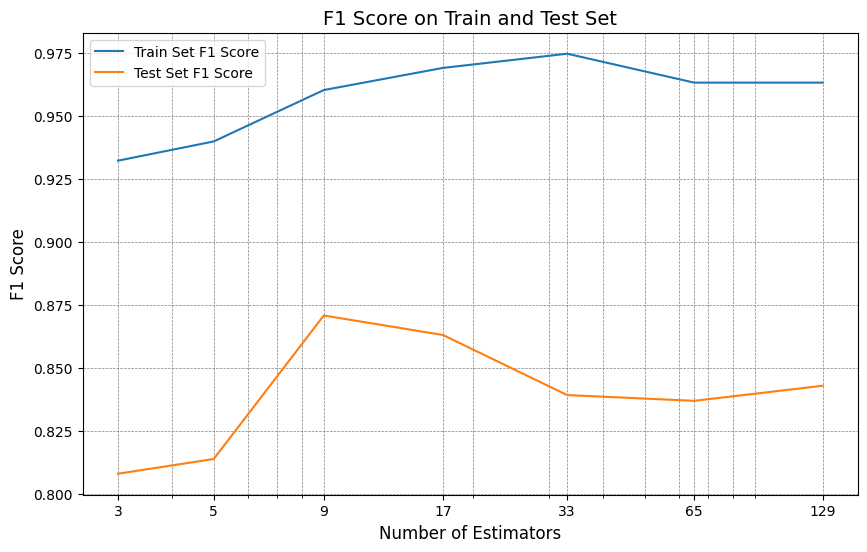

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))                        # Create a figure and axis

ax.plot(n_estimators, train_f1, label="Train Set F1 Score")    # Plot F1 scores for the training set
ax.plot(n_estimators, test_f1, label="Test Set F1 Score")      # Plot F1 scores for the testing set

ax.set_xscale("log")                                           # Set x-axis to logarithmic scale
ax.set_xticks(n_estimators)                                    # Set the x-axis ticks to the exact estimator values
ax.set_xticklabels(n_estimators, fontsize=10)                  # Set the labels for the ticks

ax.legend()                                                    # Add legend to differentiate lines
ax.set_xlabel("Number of Estimators", fontsize=12)             # Label for the x-axis
ax.set_ylabel("F1 Score", fontsize=12)                         # Label for the y-axis
ax.set_title("F1 Score on Train and Test Set", fontsize=14)    # Add title to the plot

ax.grid(visible=True, which="both", linestyle="--",            # Add gridlines for both axes
        color="grey", linewidth=0.5)                           # Configure gridline style

plt.show()                                                     # Display the plot

#### Recommendation:

* Select the number of estimators where the test set F1 score is maximized to achieve the best generalization. Based on the graph, this occurs around **9 estimators**.

* Using more than 9 estimators may lead to diminishing returns or overfitting, as indicated by the slight decline in the test F1 score.

### Changing Training Dataset and Impose Further Regularization

In [33]:
# Split the dataset into training and testing sets
boston_bag_train, boston_bag_test = train_test_split(
    boston_bag,             # The dataset to split
    train_size=0.7,         # Use 70% of the data for training
    shuffle=True,           # Shuffle the data before splitting
    random_state=1          # Set random state for reproducibility
)
# Separate features (X) and target variable (y) for training and testing sets
boston_bag_train_X = boston_bag_train.drop(["medv"], axis=1).to_numpy()  # Training features as a NumPy array
boston_bag_train_y = boston_bag_train["medv"].to_numpy()                 # Training target as a NumPy array
boston_bag_test_X = boston_bag_test.drop(["medv"], axis=1).to_numpy()    # Testing features as a NumPy array
boston_bag_test_y = boston_bag_test["medv"].to_numpy()                   # Testing target as a NumPy array

# Initialize lists to store F1 scores for training and testing sets
train_f1 = []  # List to hold F1 scores for the training set
test_f1 = []   # List to hold F1 scores for the testing set

# Define the number of estimators as powers of 2 plus 1 for the bagging classifier
n_estimators = [2**i + 1 for i in range(1, 8)]  # Create a list of estimator values

# Initialize the base decision tree estimator for the bagging classifier
base_estimator = DecisionTreeClassifier(
    random_state=0,         # Set random state for reproducibility
    max_depth=4,            # Set maximum depth of the tree to 4
    min_samples_split=30    # Minimum number of samples required to split a node
)

# Loop through the defined number of estimators
for n_estimator in n_estimators:
    
    # Initialize the bagging classifier with the specified base estimator and number of estimators
    bagging_clf = BaggingClassifier(
        estimator=base_estimator,       # Use the decision tree as the base estimator
        n_estimators=n_estimator,       # Number of estimators in the bagging ensemble
        n_jobs=20,                      # Use up to 20 CPU cores for parallel processing
        random_state=0                  # Set random state for reproducibility
    )
    # Train the bagging classifier on the training data
    bagging_clf.fit(boston_bag_train_X, boston_bag_train_y)

    # Calculate F1 score for the training set predictions and append to the list
    train_f1.append(f1_score(boston_bag_train_y, bagging_clf.predict(boston_bag_train_X)))

    # Calculate F1 score for the testing set predictions and append to the list
    test_f1.append(f1_score(boston_bag_test_y, bagging_clf.predict(boston_bag_test_X)))

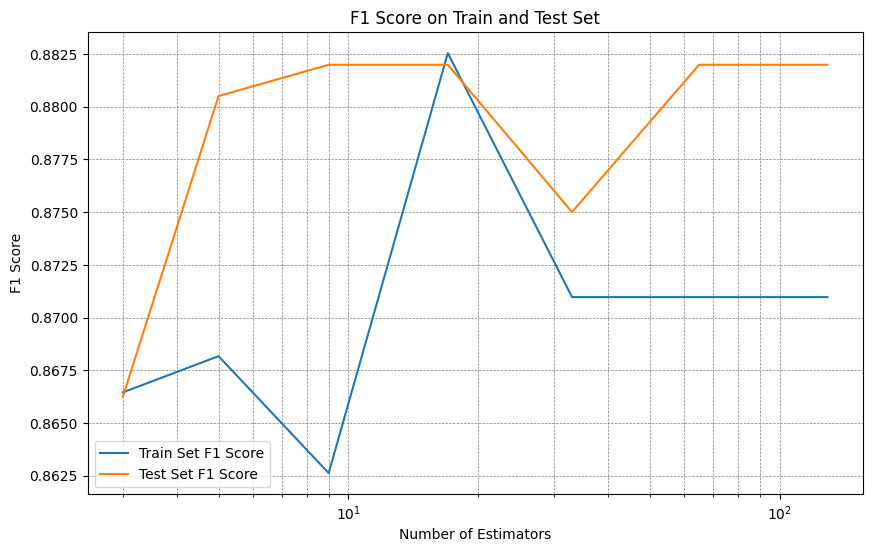

In [34]:
# Plot F1 scores for training and testing sets
plt.figure(figsize=(10, 6))                                   # Set figure size
plt.plot(n_estimators, train_f1, label="Train Set F1 Score")  # Plot F1 scores for training set
plt.plot(n_estimators, test_f1, label="Test Set F1 Score")    # Plot F1 scores for testing set
plt.xscale("log")                                             # Set x-axis to logarithmic scale
plt.legend()                                                  # Add a legend to differentiate lines
plt.xlabel("Number of Estimators")                            # Label for x-axis
plt.ylabel("F1 Score")                                        # Label for y-axis
plt.title("F1 Score on Train and Test Set")                   # Add a title to the plot

plt.grid(visible=True, which="both", linestyle="--",          # Add vertical and horizontal gridlines
         color="grey", linewidth=0.5, axis="both")            # Set gridlines for both axes

plt.show()                                                    # Display the plot

Another way:

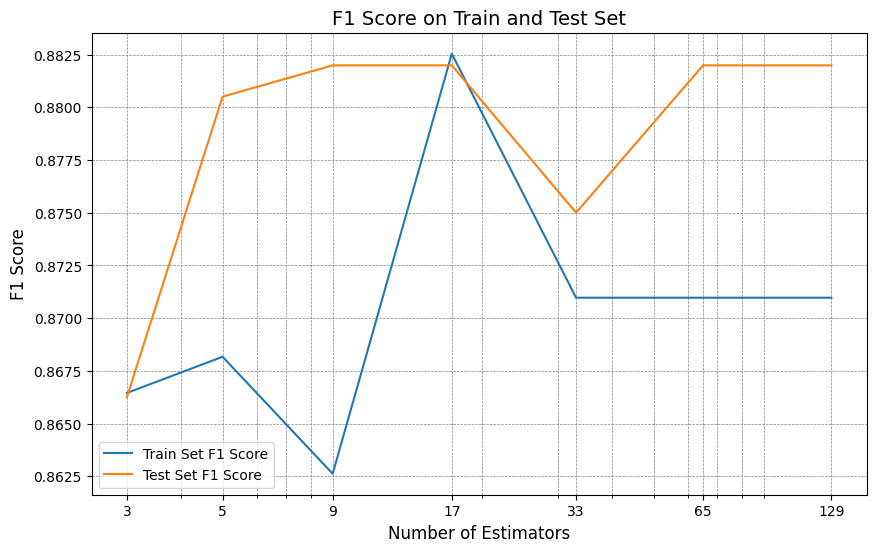

In [36]:
# Plot F1 scores for training and testing sets
fig, ax = plt.subplots(figsize=(10, 6))                        # Create a figure and axis

ax.plot(n_estimators, train_f1, label="Train Set F1 Score")    # Plot F1 scores for training set
ax.plot(n_estimators, test_f1, label="Test Set F1 Score")      # Plot F1 scores for testing set

ax.set_xscale("log")                                           # Set x-axis to logarithmic scale
ax.set_xticks(n_estimators)                                    # Set the x-axis ticks to the exact estimator values
ax.set_xticklabels(n_estimators, fontsize=10)                  # Set the labels for the ticks

ax.legend()                                                    # Add legend to differentiate lines
ax.set_xlabel("Number of Estimators", fontsize=12)             # Label for the x-axis
ax.set_ylabel("F1 Score", fontsize=12)                         # Label for the y-axis
ax.set_title("F1 Score on Train and Test Set", fontsize=14)    # Add title to the plot

ax.grid(visible=True, which="both", linestyle="--",            # Add gridlines for both axes
        color="grey", linewidth=0.5)                           # Configure gridline style

plt.show()                                                     # Display the plot

#### Recommendation:

* The Test Set F1 Score peaks at **33 estimators** and remains relatively stable for higher values.
                                                                          
* The Train Set F1 Score remains consistent but does not show significant overfitting, even as the number of estimators increases.

# Boosting
Unlike bagging, which focuses on reducing variance, the goal of boosting is to reduce bias without increasing variance.
### Gradient Descent Boosting

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


boston_boost = boston.copy()      # Create a copy of the Boston dataset

# Split the dataset into training and testing sets
boston_boost_train, boston_boost_test = train_test_split(boston_boost,   # Use the copied dataset for splitting
                                                         train_size=0.7, # Assign 70% of data to the training set
                                                         shuffle=True,   # Shuffle the data before splitting
                                                         random_state=1) # Set random seed for reproducibility

# Separate features (X) and target variable (y) for training and testing sets
boston_boost_train_X, boston_boost_train_y = boston_boost_train.drop(["medv"], axis=1).to_numpy(), boston_boost_train["medv"].to_numpy()  # for training
boston_boost_test_X, boston_boost_test_y = boston_boost_test.drop(["medv"], axis=1).to_numpy(), boston_boost_test["medv"].to_numpy()      # for testing

# Initialize the Gradient Boosting Regressor
gdb_reg = GradientBoostingRegressor(random_state=0)       

# Train the Gradient Boosting Regressor on the training data
gdb_reg.fit(boston_boost_train_X, boston_boost_train_y)   

# Calculate the Mean Squared Error (MSE) for the training set
mse_train = mean_squared_error(gdb_reg.predict(boston_boost_train_X), boston_boost_train_y)

print(f'MSE for the training set: {mse_train:.4f}')

MSE for the training set: 1.4718


In [40]:
# Calculate and print the Mean Squared Error (MSE) for the testing set
mse_test = mean_squared_error(gdb_reg.predict(boston_boost_test_X), boston_boost_test_y) 

print(f'MSE for the testing set: {mse_test:.4f}')

MSE for the testing set: 7.2207


Here, the MSE on the training set is about **1.5**. On the test set, it is about **7.1**, which is
likely due to overfitting. Now, let's limit the number of iterations so that we can inspect the
turning point. The following code snippet will help us visualize this:

In [42]:
# Initialize empty lists to store MSE values for training and testing sets
train_mse = []                     # List to store MSE for training set
test_mse = []                      # List to store MSE for testing set

# Define a range for the number of estimators to test
n_estimators = range(10, 300, 20)  # Test from 10 to 300 estimators with a step of 20

# Loop through the number of estimators
for n_estimator in n_estimators:
    gdb_reg = GradientBoostingRegressor(random_state=0,           # Initialize Gradient Boosting Regressor
                                        n_estimators=n_estimator) # Set the number of estimators
    gdb_reg.fit(boston_boost_train_X, boston_boost_train_y)       # Train the model on the training data
    
    # Calculate and append MSE for the training set
    train_mse.append(mean_squared_error(
        gdb_reg.predict(boston_boost_train_X), boston_boost_train_y))
    
    # Calculate and append MSE for the testing set
    test_mse.append(mean_squared_error(
        gdb_reg.predict(boston_boost_test_X), boston_boost_test_y))

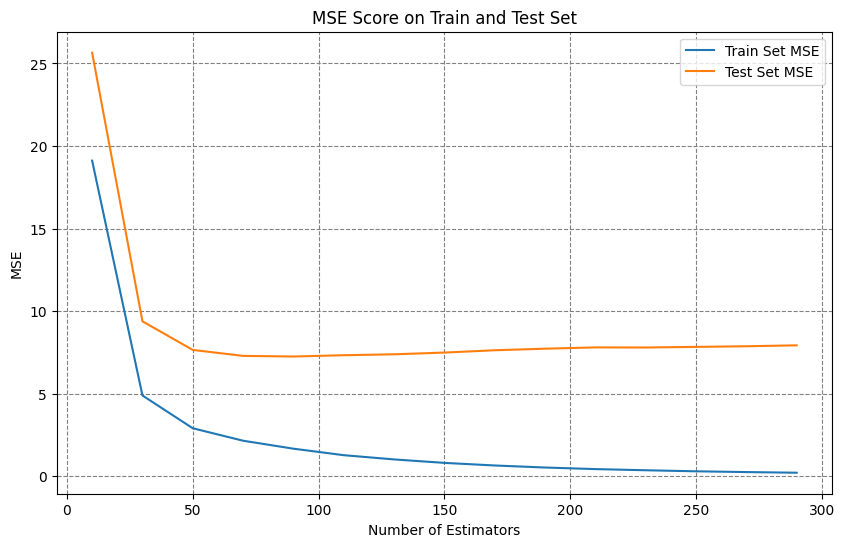

In [43]:
# Plot the results
plt.figure(figsize=(10, 6))                               # Create a figure with a specific size
plt.plot(n_estimators, train_mse, label="Train Set MSE")  # Plot MSE for the training set
plt.plot(n_estimators, test_mse, label="Test Set MSE")    # Plot MSE for the testing set
plt.legend()                                              # Add a legend to differentiate lines
plt.xlabel("Number of Estimators")                        # Label the x-axis
plt.ylabel("MSE")                                         # Label the y-axis
plt.title("MSE Score on Train and Test Set")              # Add a title to the plot
plt.grid(visible=True, linestyle="--", color="grey")      # Add grid lines to the plot
plt.show()                                                # Display the plot

*Number of estimators in terms of boosting and MSE.*

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a Random Forest Regressor with specific parameters
regr = RandomForestRegressor(max_depth=5,               # Set the maximum depth of each tree to 5
                             random_state=0,            # Use a random state for reproducibility
                             n_estimators=25,           # Use 25 trees in the forest
                             max_features="sqrt")       # Limit the max # of features considered at each split to the square root of the total features

# Train the Random Forest Regressor on the training data
regr.fit(boston_boost_train_X, boston_boost_train_y)    # Fit the model using training features and target values

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=25,
                      random_state=0)

In [47]:
# Initialize empty lists to store Mean Squared Error (MSE) values
train_mse = []                                             # List for training set MSE
test_mse = []                                              # List for testing set MSE

# Define the range of n_estimators to test
n_estimators = range(10, 300, 20)                          # Test from 10 to 290 estimators, increasing by 20

# Loop through the defined number of estimators
for n_estimator in n_estimators:
    # Initialize a Random Forest Regressor with specified parameters
    regr = RandomForestRegressor(max_depth=6,              # Set the maximum depth of each tree to 6
                                 random_state=0,           # Use a random state for reproducibility
                                 n_estimators=n_estimator, # Set the number of trees in the forest
                                 max_features="sqrt")      # Use the square root of features at each split

    # Train the model on the training data
    regr.fit(boston_boost_train_X, boston_boost_train_y)   # Fit the regressor to the training features and target values

    # Calculate MSE for the training set and append to train_mse
    train_mse.append(mean_squared_error(regr.predict(boston_boost_train_X), boston_boost_train_y)) # Predict on train set and compute MSE

    # Calculate MSE for the testing set and append to test_mse
    test_mse.append(mean_squared_error(regr.predict(boston_boost_test_X), boston_boost_test_y))    # Predict on test set and compute MSE

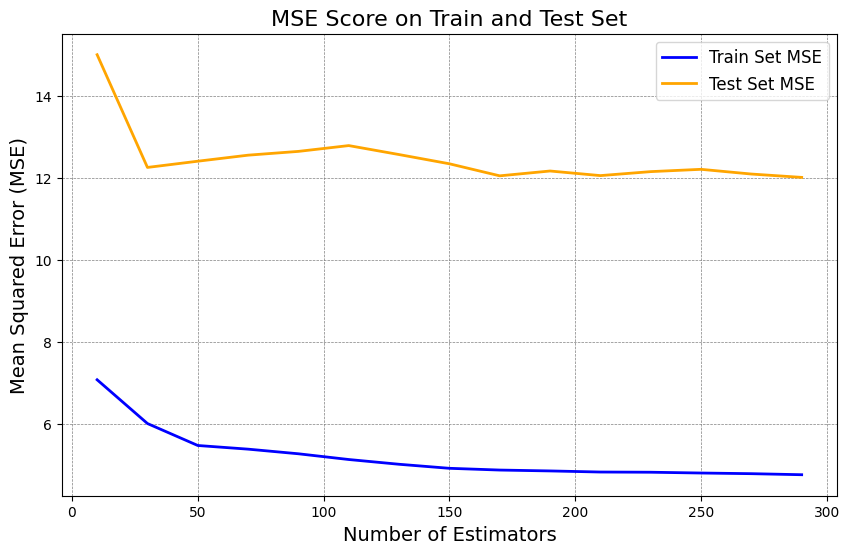

In [48]:
plt.figure(figsize=(10, 6))                             # Set the figure size for the plot

plt.plot(n_estimators, train_mse,                       # Plot the training set MSE
         label="Train Set MSE",                         # Label for the training set line
         linewidth=2,                                   # Line width for better visibility
         color="blue")                                  # Color for the training set line

plt.plot(n_estimators, test_mse,                        # Plot the testing set MSE
         label="Test Set MSE",                          # Label for the testing set line
         linewidth=2,                                   # Line width for better visibility
         color="orange")                                # Color for the testing set line

plt.legend(fontsize=12)                                 # Add a legend with font size adjustment
plt.xlabel("Number of Estimators", fontsize=14)         # Set the x-axis label with larger font size
plt.ylabel("Mean Squared Error (MSE)", fontsize=14)     # Set the y-axis label with larger font size
plt.title("MSE Score on Train and Test Set", fontsize=16) # Set the title with larger font size

plt.grid(visible=True, linestyle="--", color="grey", linewidth=0.5)  # Add gridlines for better readability
plt.show()                                              # Display the plot

*Estimators versus MSE in random forest regression.*